[![Labellerr](https://storage.googleapis.com/labellerr-cdn/%200%20Labellerr%20template/notebook.webp)](https://www.labellerr.com)

# **Comparative Performance Analysis of YOLO26**

---

[![labellerr](https://img.shields.io/badge/Labellerr-BLOG-black.svg)](https://www.labellerr.com/blog)
[![Youtube](https://img.shields.io/badge/Labellerr-YouTube-b31b1b.svg)](https://www.youtube.com/@Labellerr)
[![Github](https://img.shields.io/badge/Labellerr-GitHub-green.svg)](https://github.com/Labellerr/Hands-On-Learning-in-Computer-Vision)

# YOLO26 vs YOLO11 vs RT-DETR: Comprehensive Comparison

This notebook provides a detailed comparison of YOLO26, YOLO11, and RT-DETR models, focusing on architectural improvements, performance benchmarks, and practical deployment considerations.

**Key Focus Areas:**
- Architectural innovations in YOLO26
- Performance metrics (speed, accuracy, efficiency)
- Edge deployment capabilities
- Use case recommendations


## Environment Setup

Installing required dependencies and importing libraries for model comparison.


In [ ]:
# !pip install opencv-python psutil gputil ultralytics

In [ ]:
import cv2
import time
import psutil
import GPUtil
import torch
import numpy as np
import matplotlib.pyplot as plt
import threading
from ultralytics import YOLO, RTDETR

## Architectural Comparison

### YOLO26 Key Innovations
**Released:** January 14, 2026

**Major Improvements:**
- **End-to-End NMS-Free Design**: Eliminates Non-Maximum Suppression for simplified deployment
- **DFL Removal**: Distribution Focal Loss removed for 43% faster CPU inference
- **MuSGD Optimizer**: Hybrid SGD+Muon optimizer for stable convergence
- **ProgLoss + STAL**: Small-Target-Aware Label Assignment for improved small object detection
- **Optimized for Edge**: Better CPU performance on Raspberry Pi, mobile devices

## Model Initialization

Loading YOLO26, YOLO11, and RT-DETR models with comparable sizes (nano, small, medium variants) for fair comparison.


In [ ]:
# 1. Load Models
print(" Loading YOLO11n...")
model_11 = YOLO('yolo11n.pt')

print(" Loading YOLO26n...")
model_26 = YOLO('yolo26n.pt')

print("\n✅ Models loaded successfully!")

 Loading YOLO11n...
 Loading YOLO26n...

✅ Models loaded successfully!


## Small Object Detection Performance

Analyzing YOLO26's ProgLoss and STAL improvements for small object detection compared to YOLO11 and RT-DETR.

In [ ]:
# --- TEST 1: STAL (Small Target Aware Labeling) ---
img_url = "https://images.pexels.com/photos/16959673/pexels-photo-16959673.jpeg"

print(f" Running Test on: {img_url}")

# Run inference with low confidence to catch small background objects
res_11 = model_11(img_url, conf=0.25, verbose=False, device='cpu')[0]
res_26 = model_26(img_url, conf=0.25, verbose=False, device='cpu')[0]

count_11 = len(res_11.boxes)
count_26 = len(res_26.boxes)

print(f"\n Detection Counts:")
print(f"   - YOLO11: {count_11} objects")
print(f"   - YOLO26: {count_26} objects")


 Running STAL Test on: https://images.pexels.com/photos/16959673/pexels-photo-16959673.jpeg
Found https://images.pexels.com/photos/16959673/pexels-photo-16959673.jpeg locally at pexels-photo-16959673.jpeg
Found https://images.pexels.com/photos/16959673/pexels-photo-16959673.jpeg locally at pexels-photo-16959673.jpeg

 Detection Counts:
   - YOLO11: 11 objects
   - YOLO26: 10 objects


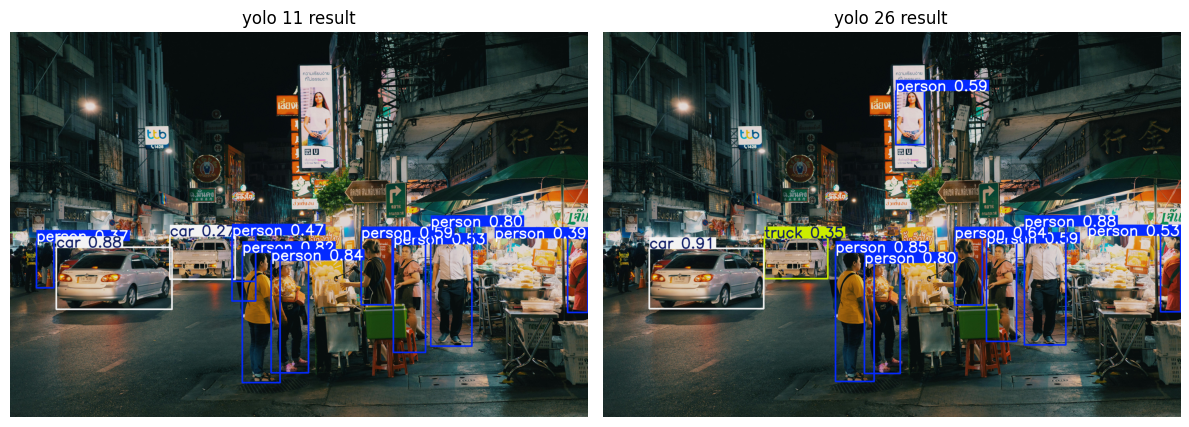

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot first result
im1_bgr = res_11.plot()  # Returns BGR numpy array
im1_rgb = cv2.cvtColor(im1_bgr, cv2.COLOR_BGR2RGB)
axes[0].imshow(im1_rgb)
axes[0].set_title("yolo 11 result")
axes[0].axis('off')

# Plot second result
im2_bgr = res_26.plot()
im2_rgb = cv2.cvtColor(im2_bgr, cv2.COLOR_BGR2RGB)
axes[1].imshow(im2_rgb)
axes[1].set_title("yolo 26 result")
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Post-Processing Overhead

Analyzing NMS overhead in YOLO11 and RT-DETR vs YOLO26's end-to-end design.

In [33]:
# --- TEST 2: NMS-Free Architecture Check ---
print(f"Checking Post-Processing Speeds...")

# We use the results from the previous cell
speed_11 = res_11.speed['postprocess']
speed_26 = res_26.speed['postprocess']

print(f"   - YOLO11 Post-Process Time: {speed_11:.2f} ms")
print(f"   - YOLO26 Post-Process Time: {speed_26:.2f} ms")

Checking Post-Processing Speeds...
   - YOLO11 Post-Process Time: 0.55 ms
   - YOLO26 Post-Process Time: 0.20 ms


## Comparision of RTDETR and YOLOv26

In [38]:
model_rtdetr = RTDETR("rtdetr-x.pt")
model_yolo26 = YOLO("yolo26x.pt")

In [ ]:
print(f" Running STAL Test on: {img_url}")

# Run inference with low confidence to catch small background objects
res_rtdetr = model_rtdetr(img_url, conf=0.25, verbose=False, device='cpu')[0]
res_yolo26 = model_yolo26(img_url, conf=0.25, verbose=False, device='cpu')[0]


count_rtdetr = len(res_rtdetr.boxes)
count_yolo26 = len(res_yolo26.boxes)

print(f"\n Detection Counts:")
print(f"   - RTDETR: {count_rtdetr} objects")
print(f"   - YOLO26: {count_yolo26} objects")

 Running STAL Test on: https://images.pexels.com/photos/16959673/pexels-photo-16959673.jpeg
Found https://images.pexels.com/photos/16959673/pexels-photo-16959673.jpeg locally at pexels-photo-16959673.jpeg
Found https://images.pexels.com/photos/16959673/pexels-photo-16959673.jpeg locally at pexels-photo-16959673.jpeg

 Detection Counts:
   - RTDETR: 52 objects
   - YOLO26: 21 objects


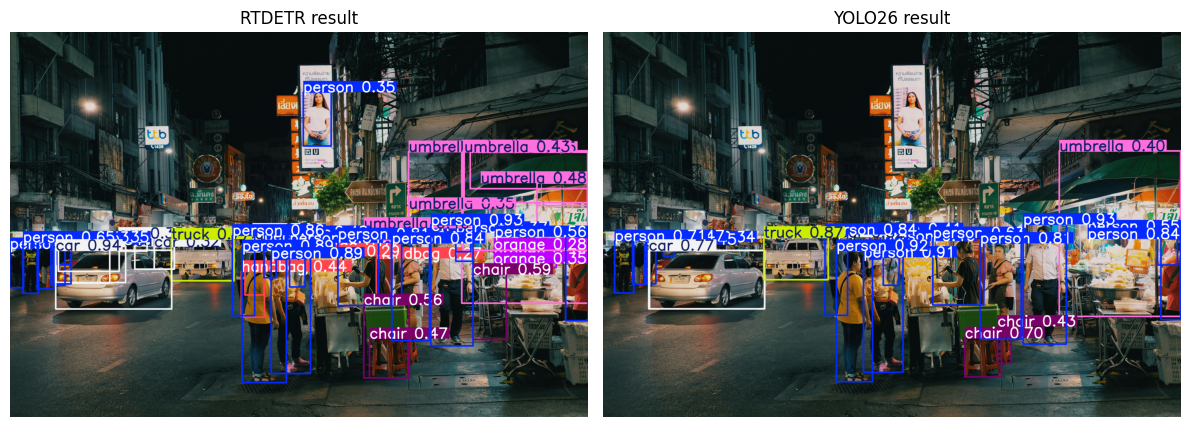

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot first result
im1_bgr = res_rtdetr.plot()  # Returns BGR numpy array
im1_rgb = cv2.cvtColor(im1_bgr, cv2.COLOR_BGR2RGB)
axes[0].imshow(im1_rgb)
axes[0].set_title("RTDETR result")
axes[0].axis('off')

# Plot second result
im2_bgr = res_yolo26.plot()
im2_rgb = cv2.cvtColor(im2_bgr, cv2.COLOR_BGR2RGB)
axes[1].imshow(im2_rgb)
axes[1].set_title("YOLO26 result")
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [52]:
# --- TEST 2: NMS-Free Architecture Check ---
print(f"Checking Post-Processing Speeds...")

# We use the results from the previous cell
speed_rtdetr = res_rtdetr.speed['postprocess']
speed_yolo26 = res_yolo26.speed['postprocess']

print(f"   - RTDETR Post-Process Time: {speed_rtdetr:.2f} ms")
print(f"   - YOLO26 Post-Process Time: {speed_yolo26:.2f} ms")

Checking Post-Processing Speeds...
   - RTDETR Post-Process Time: 0.53 ms
   - YOLO26 Post-Process Time: 0.17 ms


## Real Time Video Comparision

In [ ]:
class HardwareMonitor:
    def __init__(self, update_interval=0.5):
        self.cpu_usage = 0
        self.gpu_usage = 0
        self.gpu_mem = 0
        self.running = False
        self.interval = update_interval

    def start(self):
        self.running = True
        t = threading.Thread(target=self._monitor_loop, daemon=True)
        t.start()

    def _monitor_loop(self):
        while self.running:
            self.cpu_usage = psutil.cpu_percent(interval=None)
            try:
                gpus = GPUtil.getGPUs()
                if gpus:
                    self.gpu_usage = gpus[0].load * 100
                    self.gpu_mem = gpus[0].memoryUtil * 100
            except:
                pass 
            time.sleep(self.interval)

    def stop(self):
        self.running = False

# --- Part 2: The Annotation Helper ---
def draw_dashboard(frame, monitor, inference_time_ms, model_name):
    lines = [
        f"Model: {model_name}",
        f"CPU Usage : {monitor.cpu_usage:.1f}%",
        f"GPU Usage : {monitor.gpu_usage:.1f}%",
        f"GPU Mem   : {monitor.gpu_mem:.1f}%",
        f"Inference : {inference_time_ms:.1f} ms"
    ]
    
    x, y = 20, 40
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.6
    color = (0, 255, 0) 
    thickness = 2
    line_height = 30

    overlay = frame.copy()
    cv2.rectangle(overlay, (x-10, y-30), (x+250, y + len(lines)*30), (0, 0, 0), -1)
    alpha = 0.6
    cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)

    for i, line in enumerate(lines):
        cv2.putText(frame, line, (x, y + i * line_height), font, font_scale, color, thickness)

    return frame

# --- Part 3: Main Execution ---
def run_inference(video_source=0, model_path='yolo26n.pt', save_video=False, model_type="yolo"):
    # 1. Setup Monitor & Model
    monitor = HardwareMonitor()
    monitor.start()
    
    if model_type == "yolo":
        model = YOLO(model_path)
    elif model_type == "rtdetr":
        model = RTDETR(model_path)
    else:
        raise ValueError("Invalid model type. Use 'yolo' or 'rtdetr'.")
    
    cap = cv2.VideoCapture(video_source)

    # 2. Setup Video Writer (If saving is enabled)
    out = None
    if save_video:
        # Get input video properties
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = cap.get(cv2.CAP_PROP_FPS)
        
        # If using webcam, FPS might be 0 or variable, safer to force 30
        if fps == 0: fps = 30 
        
        # Setup the writer (mp4v is a safe codec for .mp4)
        fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
        out = cv2.VideoWriter('output_inference.mp4', fourcc, fps, (width, height))
        print(f"Recording started: Saving to 'output_inference.mp4'...")

    print("Starting inference... Press 'q' to exit.")

    while cap.isOpened():
        start_time = time.time()
        success, frame = cap.read()
        if not success:
            break

        # Inference
        results = model(frame, verbose=False, device="cpu") 
        
        # Timing
        end_time = time.time()
        inf_time = (end_time - start_time) * 1000

        # Draw
        annotated_frame = results[0].plot()
        final_frame = draw_dashboard(annotated_frame, monitor, inf_time, model_path)

        # 3. Write Frame to File
        if save_video and out is not None:
            out.write(final_frame)

        # Show Output
        cv2.imshow("YOLO Dashboard", final_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Cleanup
    monitor.stop()
    cap.release()
    if out is not None:
        out.release() # Important: Finalizes the video file
        print("Video saved successfully.")
    cv2.destroyAllWindows()

In [ ]:
video_path_1 = r"video/streetview.mp4"

model_yolo26x = "yolo26x.pt"
run_inference(video_source=video_path_1, # for webcam use 0
            model_path=model_yolo26x, 
            save_video=True)

In [ ]:
video_path_1 = r"video/streetview.mp4"

model_rtdetr = "rtdetr-x.pt"
run_inference(video_source=video_path_1, # for webcam use 0
            model_path=model_rtdetr, 
            save_video=True,
            model_type="rtdetr")

---

## 👨‍💻 About Labellerr's Hands-On Learning in Computer Vision

Thank you for exploring this **Labellerr Hands-On Computer Vision Cookbook**! We hope this notebook helped you learn, prototype, and accelerate your vision projects.  
Labellerr provides ready-to-run Jupyter/Colab notebooks for the latest models and real-world use cases in computer vision, AI agents, and data annotation.

---
## 🧑‍🔬 Check Our Popular Youtube Videos

Whether you're a beginner or a practitioner, our hands-on training videos are perfect for learning custom model building, computer vision techniques, and applied AI:

- [How to Fine-Tune YOLO on Custom Dataset](https://www.youtube.com/watch?v=pBLWOe01QXU)  
  Step-by-step guide to fine-tuning YOLO for real-world use—environment setup, annotation, training, validation, and inference.
- [Build a Real-Time Intrusion Detection System with YOLO](https://www.youtube.com/watch?v=kwQeokYDVcE)  
  Create an AI-powered system to detect intruders in real time using YOLO and computer vision.
- [Finding Athlete Speed Using YOLO](https://www.youtube.com/watch?v=txW0CQe_pw0)  
  Estimate real-time speed of athletes for sports analytics.
- [Object Counting Using AI](https://www.youtube.com/watch?v=smsjBBQcIUQ)  
  Learn dataset curation, annotation, and training for robust object counting AI applications.
---

## 🎦 Popular Labellerr YouTube Videos

Level up your skills and see video walkthroughs of these tools and notebooks on the  
[Labellerr YouTube Channel](https://www.youtube.com/@Labellerr/videos):

- [How I Fixed My Biggest Annotation Nightmare with Labellerr](https://www.youtube.com/watch?v=hlcFdiuz_HI) – Solving complex annotation for ML engineers.
- [Explore Your Dataset with Labellerr's AI](https://www.youtube.com/watch?v=LdbRXYWVyN0) – Auto-tagging, object counting, image descriptions, and dataset exploration.
- [Boost AI Image Annotation 10X with Labellerr's CLIP Mode](https://www.youtube.com/watch?v=pY_o4EvYMz8) – Refine annotations with precision using CLIP mode.
- [Boost Data Annotation Accuracy and Efficiency with Active Learning](https://www.youtube.com/watch?v=lAYu-ewIhTE) – Speed up your annotation workflow using Active Learning.

> 👉 **Subscribe** for Labellerr's deep learning, annotation, and AI tutorials, or watch videos directly alongside notebooks!

---

## 🤝 Stay Connected

- **Website:** [https://www.labellerr.com/](https://www.labellerr.com/)
- **Blog:** [https://www.labellerr.com/blog/](https://www.labellerr.com/blog/)
- **GitHub:** [Labellerr/Hands-On-Learning-in-Computer-Vision](https://github.com/Labellerr/Hands-On-Learning-in-Computer-Vision)
- **LinkedIn:** [Labellerr](https://in.linkedin.com/company/labellerr)
- **Twitter/X:** [@Labellerr1](https://x.com/Labellerr1)

*Happy learning and building with Labellerr!*
